## Objective
### Develop a multi-label classification model to classify different diseases based on the microorganisms in the gut microbiome.

In [1]:
# Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install dabl
import dabl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.5/558.5 kB 13.9 MB/s eta 0:00:00


In [49]:
# Load data
df = pd.read_csv("challenge_1_gut_microbiome_data.csv")

## Data Exploration

In [3]:
df.head() # snapshot of the data

,Samples,Bacteria-1,Bacteria-2,Bacteria-3,Bacteria-4,Bacteria-5,Bacteria-6,Bacteria-7,Bacteria-8,Bacteria-9,...,Bacteria-1086,Bacteria-1087,Bacteria-1088,Bacteria-1089,Bacteria-1090,Bacteria-1091,Bacteria-1092,Bacteria-1093,Bacteria-1094,disease
0,Sample-1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disease-2
1,Sample-2,0,0,0,0,0,0,0,0,0,...,0.0,17111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disease-2
2,Sample-3,0,10,0,0,0,0,0,0,0,...,0.0,214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disease-2
3,Sample-4,0,17,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disease-2
4,Sample-5,0,8,0,0,0,0,0,0,0,...,0.0,1932.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,Disease-2


In [7]:
# data summary
df.describe()

,Bacteria-1,Bacteria-2,Bacteria-3,Bacteria-4,Bacteria-5,Bacteria-6,Bacteria-7,Bacteria-8,Bacteria-9,Bacteria-10,...,Bacteria-1085,Bacteria-1086,Bacteria-1087,Bacteria-1088,Bacteria-1089,Bacteria-1090,Bacteria-1091,Bacteria-1092,Bacteria-1093,Bacteria-1094
count,5934.000000,5934.000000,5934.000000,5934.0,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,...,5933.0,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000,5933.000000
mean,0.039602,29.593360,2.034041,0.0,0.001180,0.000843,0.189080,0.000843,0.009100,0.042299,...,0.0,0.008933,609.992921,0.016012,0.002360,0.006573,0.066914,0.000337,18.404180,0.601382
std,3.050662,363.368556,26.253458,0.0,0.090871,0.064908,3.246226,0.064908,0.455968,1.008508,...,0.0,0.688080,2875.442464,1.233350,0.181757,0.506323,4.307124,0.025965,755.560448,19.595661
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,235.000000,12607.000000,1365.000000,0.0,7.000000,5.000000,168.000000,5.000000,32.000000,45.000000,...,0.0,53.000000,79898.000000,95.000000,14.000000,39.000000,328.000000,2.000000,53963.000000,1256.000000


In [8]:
# check for nulls
df.isnull().sum()

,0
Samples,0
Bacteria-1,0
Bacteria-2,0
Bacteria-3,0
Bacteria-4,0
...,...
Bacteria-1091,1
Bacteria-1092,1
Bacteria-1093,1
Bacteria-1094,1


{'Disease-3', nan, 'Disease-2', 'Disease-1', 'Healthy'}


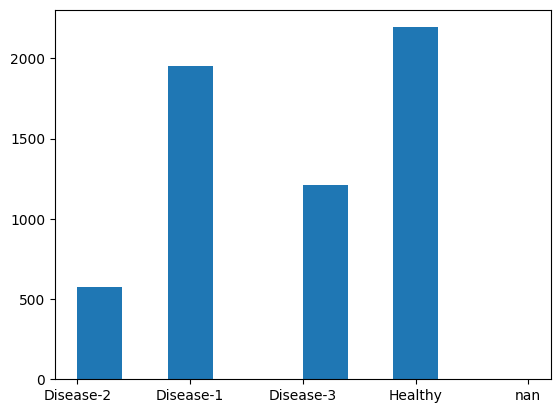

In [4]:
# Get the class info of all samples
Y = df.iloc[:, 1095]

classes = set(list(df['disease']))
print(classes)
plt.hist(list(Y))
plt.savefig('barchart.png')

# Looks like there is some imbalance in the data

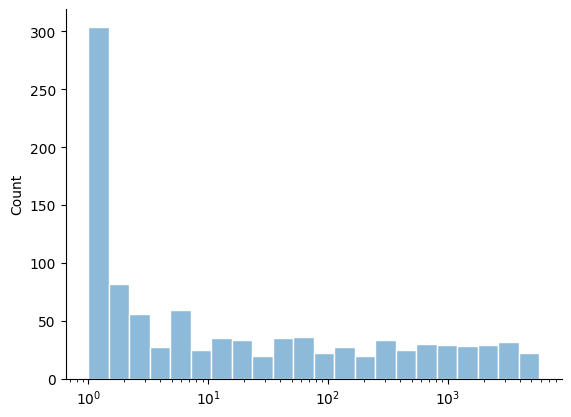

In [5]:
# # Count number of occurrences of each bacteria in samples
counts = []
for i in range(1, df.shape[1] - 1): #iterate over columns of dataframe
    counts.append(sum(df.iloc[:, i] > 0)) #append number of values greater than 0

#Generate Histogram
sns.histplot(counts, log_scale = True, bins = 22, edgecolor = 'white', alpha = 0.5)
sns.despine()

<BarContainer object of 4 artists>

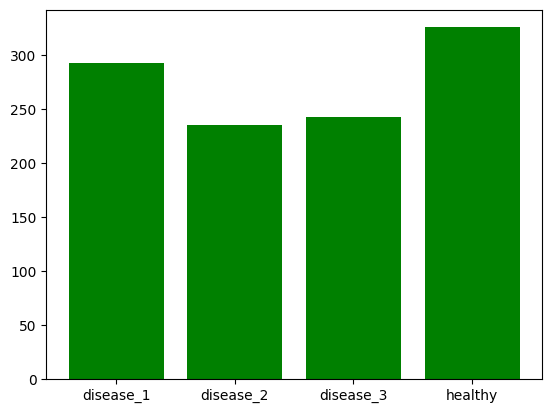

In [6]:
# number of bacteria represented in different classes
disease_1 = df[df['disease'] == 'Disease-1']
disease_2= df[df['disease'] == 'Disease-2']
disease_3= df[df['disease'] == 'Disease-3']
healthy= df[df['disease'] == 'Healthy']
threshold = 20

disease_1_count = []
disease_2_count = []
disease_3_count = []
healthy_count = []

for i in range(1, 1095, 1):
    bacteria_i_diseases_1 = np.array(disease_1.iloc[:, i])
    bacteria_i_diseases_2 = np.array(disease_2.iloc[:, i])
    bacteria_i_diseases_3 = np.array(disease_3.iloc[:, i])
    bacteria_i_healthy = np.array(healthy.iloc[:, i])

    disease_1_count.append(np.count_nonzero(bacteria_i_diseases_1))
    disease_2_count.append(np.count_nonzero(bacteria_i_diseases_2))
    disease_3_count.append(np.count_nonzero(bacteria_i_diseases_3))
    healthy_count.append(np.count_nonzero(bacteria_i_healthy))

disease_1_filtered = []
for i in disease_1_count:
    if i > threshold:
        disease_1_filtered.append(i)

disease_2_filtered = []
for i in disease_2_count:
    if i > threshold:
        disease_2_filtered.append(i)

disease_3_filtered = []
for i in disease_3_count:
    if i > threshold:
        disease_3_filtered.append(i)

healthy_filtered = []
for i in healthy_count:
    if i > threshold:
        healthy_filtered.append(i)

class_thresholded = {'disease_1': len(disease_1_filtered), 'disease_2': len(disease_2_filtered), 'disease_3': len(disease_3_filtered),
                    'healthy': len(healthy_filtered)}

plt.bar(class_thresholded.keys(), class_thresholded.values(), color='g')

we can see that every class do not have all bacteria represented in different samples

Based on the data exploration it shows that the data is highly sparse.  The classification model chosen should be able to handle high sparsity.

## Classifcation Modelling

In [50]:
df = df.ffill() #fill any NaNs

In [51]:
df.head()

,Samples,Bacteria-1,Bacteria-2,Bacteria-3,Bacteria-4,Bacteria-5,Bacteria-6,Bacteria-7,Bacteria-8,Bacteria-9,...,Bacteria-1086,Bacteria-1087,Bacteria-1088,Bacteria-1089,Bacteria-1090,Bacteria-1091,Bacteria-1092,Bacteria-1093,Bacteria-1094,disease
0,Sample-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Disease-2
1,Sample-2,0,0,0,0,0,0,0,0,0,...,0,17111,0,0,0,0,0,0,0,Disease-2
2,Sample-3,0,10,0,0,0,0,0,0,0,...,0,214,0,0,0,0,0,0,0,Disease-2
3,Sample-4,0,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Disease-2
4,Sample-5,0,8,0,0,0,0,0,0,0,...,0,1932,0,0,0,0,0,3,0,Disease-2


In [52]:
# Split data into predictors and predicted
y= df['disease']
X= df.iloc[:,1:-1]

In [53]:
# Label encoding for disease class label
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['disease'] = le.fit_transform(df['disease'])

y = df['disease']

In [54]:
# Feature selection
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier

clf = XGBClassifier(max_depth = 6, random_state=32)

clf.fit(X, y)

imp = clf.feature_importances_

importances = clf.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

print(X.columns[sorted_indices], sep = "\n")

Index(['Bacteria-3', 'Bacteria-345', 'Bacteria-476', 'Bacteria-985',
       'Bacteria-687', 'Bacteria-408', 'Bacteria-209', 'Bacteria-709',
       'Bacteria-132', 'Bacteria-615',
       ...
       'Bacteria-597', 'Bacteria-950', 'Bacteria-951', 'Bacteria-952',
       'Bacteria-953', 'Bacteria-954', 'Bacteria-955', 'Bacteria-956',
       'Bacteria-957', 'Bacteria-934'],
      dtype='object', length=1094)


In [55]:
# new predictor information
d = X.columns[sorted_indices]
X_new = df[d[:-200]]

In [56]:
# SMOTE-Tomek link is being used to resample and balance the data
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

sme = SMOTETomek(random_state=42)

X_res, y_res = sme.fit_resample(X_new, y)

X_res

,Bacteria-3,Bacteria-345,Bacteria-476,Bacteria-985,Bacteria-687,Bacteria-408,Bacteria-209,Bacteria-709,Bacteria-132,Bacteria-615,...,Bacteria-875,Bacteria-844,Bacteria-845,Bacteria-846,Bacteria-848,Bacteria-849,Bacteria-851,Bacteria-852,Bacteria-853,Bacteria-854
0,0,0,0,0,0,0,0,0,0,287,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,925,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2855,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,2114,...,0,0,0,0,0,0,0,0,0,0
4,0,0,47,0,0,0,0,0,0,693,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14841,0,0,0,1322,17,7,0,0,0,1349,...,0,0,0,0,0,0,0,0,0,0
14842,0,0,0,241,0,0,0,0,0,730,...,0,0,0,0,0,0,0,0,0,0
14843,0,0,0,660,26,32,0,0,0,4174,...,0,0,0,0,0,0,0,0,0,0
14844,0,0,0,419,0,5,0,0,0,9435,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 32)


from sklearn.preprocessing import RobustScaler
from pandas import DataFrame

transformation = RobustScaler()
d = transformation.fit(X_train)

X_train = d.transform(X_train)
X_test = d.transform(X_test)
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 6.,  0., 73., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [58]:
# See classifications using simple classication algorithms
classifier = dabl.SimpleClassifier(random_state=0)
classifier.fit(X_train, y_train)

Running DummyClassifier(random_state=0)
accuracy: 0.253 recall_macro: 0.250 precision_macro: 0.063 f1_macro: 0.101
=== new best DummyClassifier(random_state=0) (using recall_macro):
accuracy: 0.253 recall_macro: 0.250 precision_macro: 0.063 f1_macro: 0.101

Running GaussianNB()
accuracy: 0.537 recall_macro: 0.534 precision_macro: 0.562 f1_macro: 0.469
=== new best GaussianNB() (using recall_macro):
accuracy: 0.537 recall_macro: 0.534 precision_macro: 0.562 f1_macro: 0.469

Running MultinomialNB()
accuracy: 0.567 recall_macro: 0.564 precision_macro: 0.582 f1_macro: 0.531
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.567 recall_macro: 0.564 precision_macro: 0.582 f1_macro: 0.531

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1, random_state=0)
accuracy: 0.416 recall_macro: 0.412 precision_macro: 0.248 f1_macro: 0.289
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)
accuracy: 0.594 recall_macro: 0.594 precision_macro

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Running LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   multi_class='auto', random_state=0)
accuracy: 0.692 recall_macro: 0.691 precision_macro: 0.698 f1_macro: 0.686
=== new best LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   multi_class='auto', random_state=0) (using recall_macro):
accuracy: 0.692 recall_macro: 0.691 precision_macro: 0.698 f1_macro: 0.686



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Running LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   multi_class='auto', random_state=0)
accuracy: 0.700 recall_macro: 0.699 precision_macro: 0.703 f1_macro: 0.695
=== new best LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   multi_class='auto', random_state=0) (using recall_macro):
accuracy: 0.700 recall_macro: 0.699 precision_macro: 0.703 f1_macro: 0.695


Best model:
LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   multi_class='auto', random_state=0)
Best Scores:
accuracy: 0.700 recall_macro: 0.699 precision_macro: 0.703 f1_macro: 0.695


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SimpleClassifier(random_state=0)

In [59]:
# Leverage weak learners to create stacked-ensemble model
import pickle as pkl
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

LGB_Classifier = lgb.LGBMClassifier()
#LGB_Classifier.fit(X_train, y_train)


RF_Classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=6, n_estimators = 200)
#RF_Classifier.fit(X_train, y_train)


XGB_Classifier = XGBClassifier(random_state=42,n_jobs=-1,max_depth=7,n_estimators = 200)
#XGB_Classifier.fit(X_train, y_train)


LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=42)
#LGR_Classifier.fit(X_train, y_train)

KNN_Classifier =  KNeighborsClassifier()

estimators = [LGR_Classifier,XGB_Classifier,RF_Classifier,KNN_Classifier]


from sklearn.ensemble import StackingClassifier


estimators = [
     ('rf', RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=6, n_estimators = 200)),
     ('xgb', XGBClassifier(random_state=42,n_jobs=-1,max_depth=7,n_estimators = 200)),
     ('lgr',LogisticRegression(n_jobs=-1, random_state=42)),
     ('knn', KNeighborsClassifier())
]


clff = StackingClassifier(estimators=estimators, final_estimator=lgb.LGBMClassifier())

In [60]:
clff.fit(X_train, y_train).score(X_test, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3084
[LightGBM] [Info] Number of data points in the train set: 10392, number of used features: 16
[LightGBM] [Info] Start training from score -1.394798
[LightGBM] [Info] Start training from score -1.378244
[LightGBM] [Info] Start training from score -1.375194
[LightGBM] [Info] Start training from score -1.397130


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


0.9364616075437808

In [61]:
# Model Evaluation using Kappa and F1-Score
y_pred = clff.predict(X_test)

from sklearn.metrics import f1_score, cohen_kappa_score, confusion_matrix

f1 = f1_score(y_test, y_pred, average="micro")
cohen_kappa = cohen_kappa_score(y_test, y_pred)

print(f1)
print(cohen_kappa)

0.9364616075437808
0.9152778328560012


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [62]:
# Other Classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1134
           1       0.95      0.95      0.95      1102
           2       0.96      0.95      0.95      1102
           3       0.90      0.91      0.90      1116

    accuracy                           0.94      4454
   macro avg       0.94      0.94      0.94      4454
weighted avg       0.94      0.94      0.94      4454

